In [2]:
!pip install ipynb

In [233]:
from ipynb.fs.full.Lat_Lon_Mapping import *

In [234]:
#K-means clustering analysis
#Reference code: https://samdotson1992.github.io/SuperGIS/blog/k-means-clustering/
from sklearn.cluster import KMeans
import requests
from shapely.geometry import Point

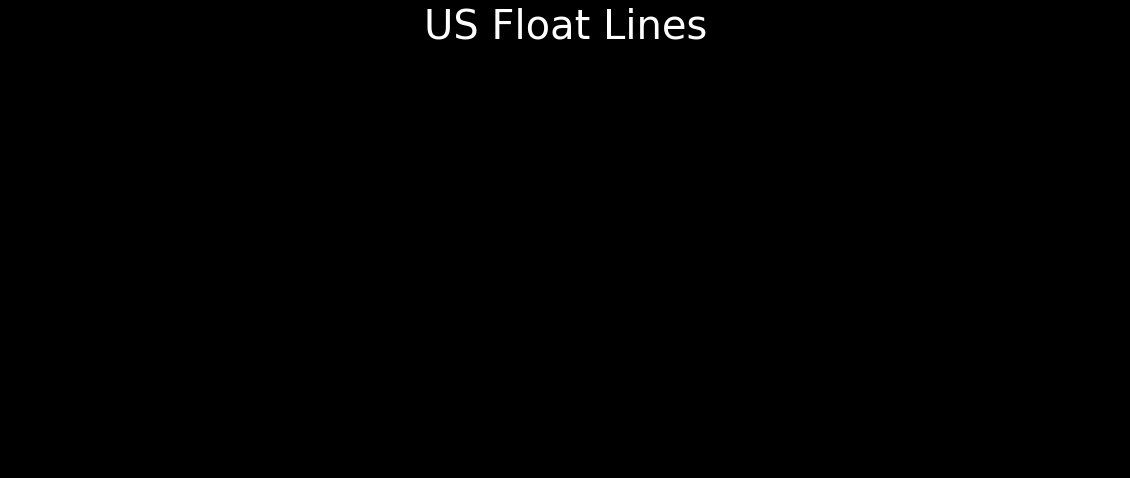

In [235]:
#Checking for float plant GeoDataFrame integrity as pointplot
fig, ax = plt.subplots(1, figsize=(20, 15))
ax.set_title("US Float Lines", fontsize=40)
ax.set_axis_off()
WOGDFF_GDF.plot(ax=ax, color='black')
plt.show()

In [236]:
#Pulling lat-lon coordinates from float plant GeoDataFrame for k-means
a=pd.Series(WOGDFF_GDF['geometry'].apply(lambda p: p.x))
b=pd.Series(WOGDFF_GDF['geometry'].apply(lambda p: p.y))
X=np.column_stack((a,b))

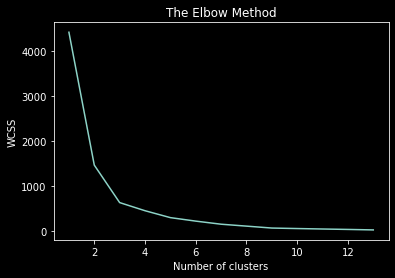

In [237]:
#Running k-means on constructed lat-lon dataset
wcss = []

"""K-Means method"""
for i in range(1, 14):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
"""Optimum cluster visualization"""
plt.plot(range(1, 14), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [238]:
#Optimum number of clusters appears to be 3 based on TEM
#Try 4
optimal_cluster = 4

In [239]:
#Conducting k-means test
kmeans = KMeans(n_clusters = optimal_cluster, init = 'k-means++', random_state = 5,  max_iter=400)
y_kmeans = kmeans.fit_predict(X)
k=pd.DataFrame(y_kmeans, columns=['cluster'])

#Joining results of k-means clustering with original pointplot
WOGDFF_GDF=WOGDFF_GDF.join(k)

Text(0.5, 1.0, 'US Glass Float Lines Clustering (4)')

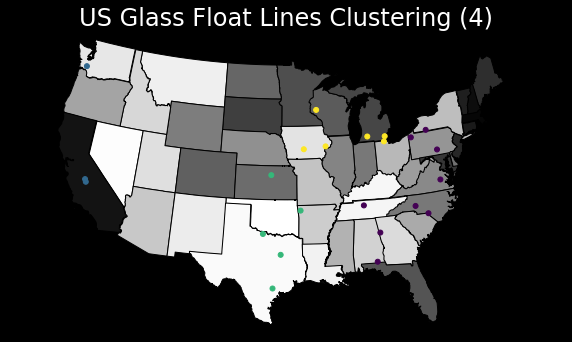

In [240]:
#Joined k-means_pointplot with us polyplot
Kusa = gplt.choropleth(
  usa,
  hue=usa['Electrical Price'],
  edgecolor="black",
  linewidth=1,
  cmap="Greys",
  projection=gcrs.AlbersEqualArea(),
  figsize=(10, 10)
)

KWOG = gplt.pointplot(
  WOGDFF_GDF,
  hue=WOGDFF_GDF['cluster'],
  limits=(3, 50),
  zorder=2,
  ax=Kusa,
  extent=extent
)

#Title
KWOG.set_title('US Glass Float Lines Clustering (4)', fontdict={'fontsize':24})

In [245]:
#Electrical Price Histogram
"""Creating new column"""
WOGDFF_GDFEP = pd.DataFrame(columns=['Electrical Price'])

"""Joining column"""
WOGDFF_GDF['Electrical Price'] = WOGDFF_GDFEP

"""Mapping electrical prices from usa to WOGDFF_GDF"""
"""Creating intermediary dictionary for mapping values"""
EPD = {}
for i in range(len(usa['STATE_ABBR'])):
    EPD[usa['STATE_ABBR'][i+1]] = usa['Electrical Price'][i+1]
   
"""Mapping values"""
for i in range(len(WOGDFF_GDF['State'])):
    WOGDFF_GDF['Electrical Price'][i] = EPD[WOGDFF_GDF['State'][i]]

<ipython-input-245-91252638d2f3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WOGDFF_GDF['Electrical Price'][i] = EPD[WOGDFF_GDF['State'][i]]


In [246]:
WOGDFF_GDF

,Company Name,Country,City,State,Number of Lines,lon,lat,geometry,cluster,Electrical Price
0,Guardian Glass,US,"Kingsburg ,US",CA,1,-119.553893,36.513840,POINT (-119.55389 36.51384),1,12.92
1,Vitro Architectural Glass,US,"Fresno ,US",CA,1,-119.708861,36.729529,POINT (-119.70886 36.72953),1,12.92
2,Fuyao Glass Industry Group Co. Ltd.,US,"Mt. Zion ,US",IL,2,-85.187170,33.634275,POINT (-85.18717 33.63428),0,6.47
3,Nippon Sheet Glass,US,"Ottawa ,US",IL,1,-97.656809,39.127365,POINT (-97.65681 39.12737),2,6.47
4,Guardian Glass,US,"DeWitt ,US",IA,1,-97.315846,29.093133,POINT (-97.31585 29.09313),2,5.46
5,AGC (Asahi Glass Co.),US,"Spring Hill ,US",KS,1,-93.647987,41.411763,POINT (-93.64799 41.41176),3,7.01
6,AGC (Asahi Glass Co.),US,"Richmond ,US",KY,1,-77.434280,37.538509,POINT (-77.43428 37.53851),0,5.13
7,Guardian Glass,US,"Carleton ,US",MI,2,-83.390766,42.059210,POINT (-83.39077 42.05921),3,7.58
8,Guardian Glass,US,"Geneva ,US",NY,1,-85.803014,31.086293,POINT (-85.80301 31.08629),0,5.61
9,Cardinal Glass Industries,US,"Mooresville ,US",NC,1,-80.810072,35.584860,POINT (-80.81007 35.58486),0,6.63


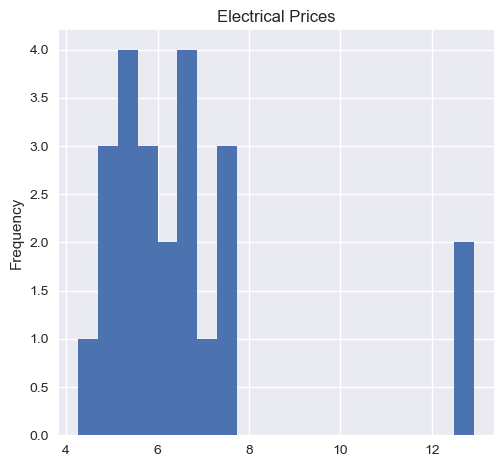

In [306]:
#Style code:https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
import seaborn

plt.style.use('seaborn')
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.hist(WOGDFF_GDF['Electrical Price'], bins=20)
plt.gca().set(title='Electrical Prices', ylabel='Frequency');